In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
data = pd.read_csv('C:/Users/Adeeb/Documents/Minor Project/Datasets/heart.csv')
data.shape

(1025, 14)

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Checking for null values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Percentage of people having heart disease or not

data['target'].value_counts(normalize = True)

1    0.513171
0    0.486829
Name: target, dtype: float64

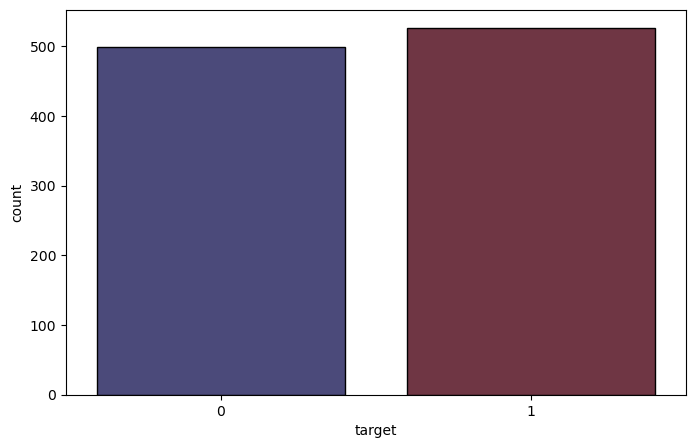

In [8]:
#Visualizing count of people having heart disease or not

plt.figure(figsize=(8,5))
sns.countplot(x = 'target', data=data, palette = 'icefire', edgecolor = 'k')
plt.show()

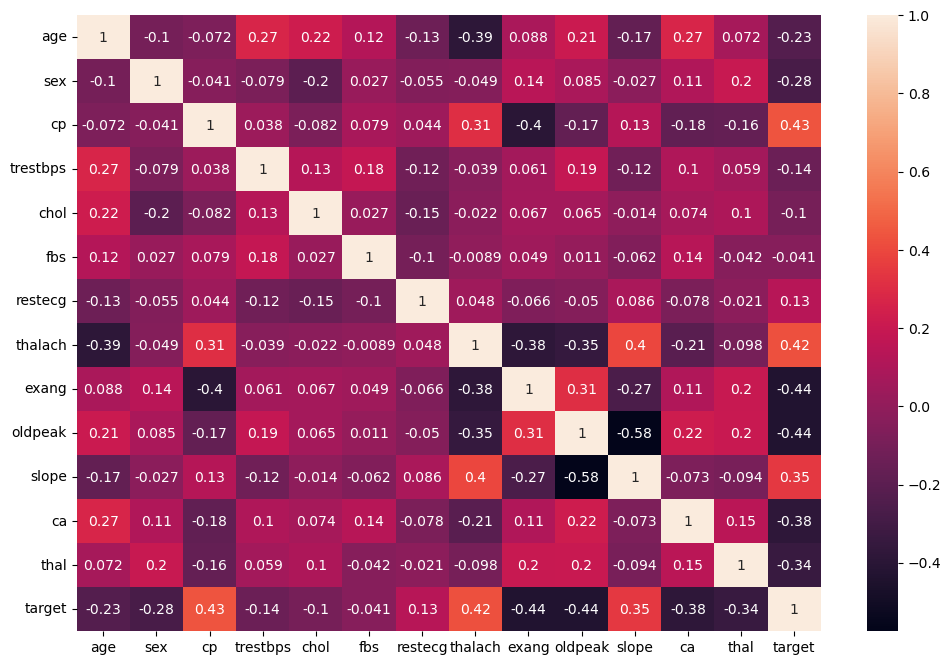

In [9]:
#Correlation matrix

cor = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot = True)
plt.show()

In [10]:
#Performing feature scaling

def standardize(data) :
    st = StandardScaler()
    columns = ['age','trestbps','chol','thalach','oldpeak']
    data[columns] = st.fit_transform(data[columns])
    return data

data_new = standardize(data)
data_new.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
5,0.393241,0,0,-1.805540,0.038784,0,0,-1.179158,0,-0.060888,1,0,2,1
6,0.393241,1,0,-1.005914,1.396233,0,2,-0.396362,0,2.834010,0,3,1,0
7,0.062402,1,0,1.621431,0.833861,0,0,-0.178919,1,-0.231177,1,1,3,0
8,-0.930114,1,0,-0.663216,0.058176,0,0,-0.222407,0,-0.231177,2,0,3,0
9,-0.047877,1,0,-0.548984,0.775685,0,0,-1.440090,1,1.812281,1,2,2,0


In [11]:
#Splitting the dataset

X = data_new.drop(['target'], axis = 1)
Y = data_new['target']

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 42)

In [13]:
#KNN and Cross-validation

score_values = []

for k in range(1,51) :
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X_train, Y_train, cv=10).mean()
    score_values.append(score)

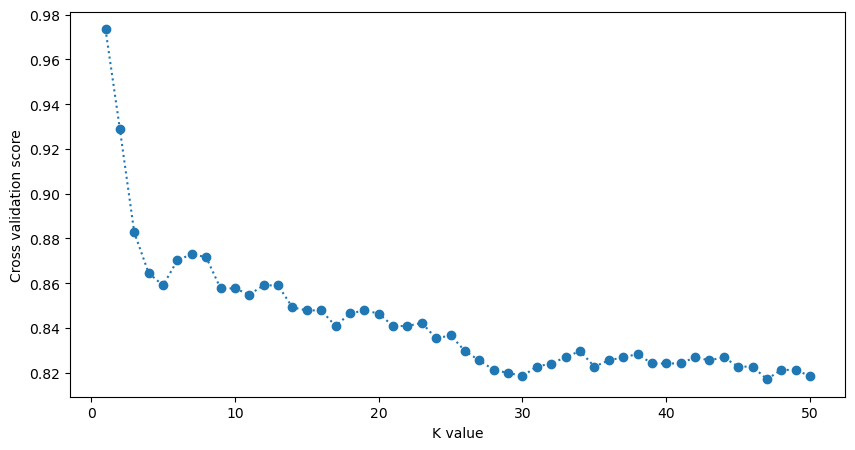

In [14]:
plt.figure(figsize=(10,5))
plt.plot(range(1,51), score_values, linestyle = 'dotted', marker = 'o')
plt.xlabel('K value')
plt.ylabel('Cross validation score')
plt.show()

In all cases the model's cross-validation score is greater than 80%. Hence, taking k = 3 because for k = 1 or 2 it may lead to overfitting

In [15]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, Y_train)

knn_predicted =  knn_model.predict(X_test)
accuracy_score(Y_test,knn_predicted)
    

0.9025974025974026

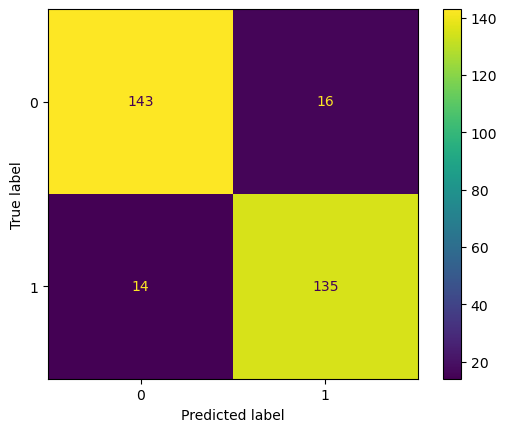

In [16]:
#Confusion Matrix

cm = confusion_matrix(Y_test,knn_predicted)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [17]:
print(classification_report(Y_test, knn_predicted))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       159
           1       0.89      0.91      0.90       149

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308



In [18]:
#Logistic Regression

lr = LogisticRegression(penalty = 'l2', C = 0.05)
lr.fit(X_train, Y_train)

lr_predicted = lr.predict(X_test)
accuracy_score(Y_test, lr_predicted)


0.8051948051948052

In [19]:
print(classification_report(Y_test, lr_predicted))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       159
           1       0.75      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.82      0.81      0.80       308



In [20]:
#Decision Tree

dt = DecisionTreeClassifier(criterion = 'gini', max_depth = None)
dt.fit(X_train, Y_train)

dt_predicted = dt.predict(X_test)
accuracy_score(Y_test, dt_predicted)

0.9707792207792207

In [21]:
print(classification_report(Y_test, dt_predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [22]:
#Random Forest and Hyperparameter Tuning

n_estimators = [10,50,100,130]
max_features = [0.5,0.7,1.0]
max_depth = [3,7,None]
max_samples = [0.3,0.7,1.0]

param_grid = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'max_samples': max_samples }

In [23]:
rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 10,
                       verbose = 2,
                       n_jobs = -1)

In [24]:
rf_grid.fit(X_train,Y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 7, None],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.3, 0.7, 1.0],
                         'n_estimators': [10, 50, 100, 130]},
             verbose=2)

In [25]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 100}

In [26]:
rf_grid.best_score_

0.984585289514867

In [56]:
#Selecting best parameters

rf_model = RandomForestClassifier(n_estimators = 100, max_features = 0.7, max_samples = 1.0, max_depth = None)
rf_model.fit(X_train, Y_train)

rf_predicted = rf_model.predict(X_test)
accuracy_score(Y_test, rf_predicted)

0.9805194805194806

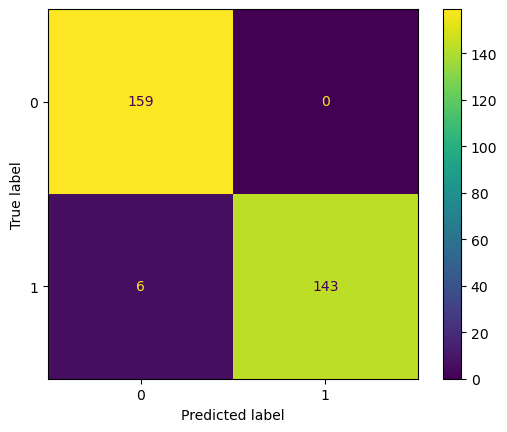

In [57]:
cm = confusion_matrix(Y_test,rf_predicted)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [58]:
print(classification_report(Y_test, rf_predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [30]:
#Gradient Boosting Classifier and tuning

n_estimators = [10,40,80,100]
learning_rate = [0.01,0.1,0.3]
max_features = [0.5,0.7,1.0]
max_depth = [3,7,None]

param_grid = { 'n_estimators': n_estimators,
               'learning_rate' : learning_rate,
               'max_features': max_features,
               'max_depth': max_depth }
                
    

In [31]:
gb = GradientBoostingClassifier()

gb_grid = GridSearchCV(estimator = gb, 
                       param_grid = param_grid,
                       cv = 10,
                       verbose = 2,
                       n_jobs = -1)

In [32]:
gb_grid.fit(X_train,Y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 7, None],
                         'max_features': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 40, 80, 100]},
             verbose=2)

In [33]:
gb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': None,
 'max_features': 0.5,
 'n_estimators': 100}

In [34]:
gb_grid.best_score_

0.984585289514867

In [55]:
gb_model = GradientBoostingClassifier(n_estimators = 40, learning_rate = 0.1, max_features = 0.5, max_depth = None)
gb_model.fit(X_train,Y_train)

gb_predicted = gb_model.predict(X_test)
accuracy_score(Y_test,gb_predicted)

0.9707792207792207

In [49]:
print(classification_report(Y_test,gb_predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



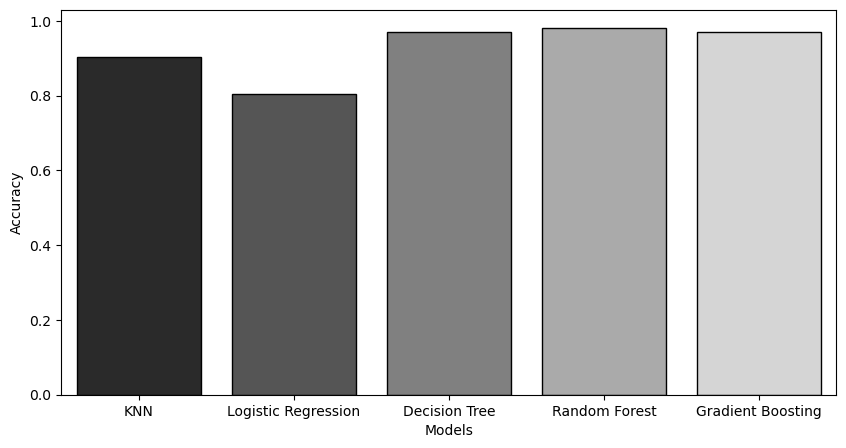

In [59]:
#Visualizing accuracies of different models:

x = ['KNN','Logistic Regression','Decision Tree','Random Forest','Gradient Boosting']
y = [accuracy_score(Y_test,knn_predicted),accuracy_score(Y_test,lr_predicted),
     accuracy_score(Y_test,dt_predicted),accuracy_score(Y_test,rf_predicted),
     accuracy_score(Y_test,gb_predicted)]

plt.figure(figsize = (10,5))
sns.barplot(x = x, y = y, palette = 'gray' , edgecolor='k')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

Accuracy of Random Forest model is the highest. Other metrics like precision and recall are also higher than the other models.
<br>Therefore, selecting Random Forest as the final model.

In [ ]:
#Using the best model to make predictions for the new data 

final_model = rf_model

In [61]:
new_values = pd.DataFrame({'age': 41,'sex': 0,'cp': 1,'trestbps': 130,'chol': 204,'fbs': 0,'restecg': 0,
                           'thalach': 172,'exang': 0,'oldpeak': 1.4,
                           'slope': 2,'ca': 0,'thal': 2}, index = [0])

new_values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [62]:
final_data = standardize(new_values)

predict_result = final_model.predict(final_data)

if (predict_result == 1) :
    print("Based on the data provided, model suggests potential presence of Heart Disease")
    
else :
    print("Based on the data provided, model indicates no presence of Heart Disease")

Based on the data provided, model suggests potential presence of Heart Disease


In [41]:
pwd

'C:\\Users\\Adeeb\\Documents\\Minor Project'

In [63]:
#Saving the trained model

import joblib

joblib.dump(final_model,'Heart Disease Pred Model')


['Heart Disease Pred Model']

In [64]:
import joblib
load_model = joblib.load('Heart Disease Pred Model')

predict_result = load_model.predict(new_values)

predict_result

array([1], dtype=int64)

In [44]:
#Deploying 

# !pip install streamlit

In [65]:
%%writefile app.py

import joblib
import streamlit as st
from PIL import Image

load_model = joblib.load('Heart Disease Pred Model')

def prediction(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal) :
    
    if sex == 'Male': 
        sex = 1
    elif sex == 'Female':
        sex = 0
        
    if cp == 'Typical angina':
        cp = 0
    elif cp == 'Atypical angina':
        cp = 1
    elif cp == 'Non-anginal pain':
        cp = 2
    elif cp == 'Asymptomatic':
        cp = 3
    
    if fbs == 'Greater than 120 mg/dl':
        fbs = 1
    elif fbs == 'Less than 120 mg/dl' : 
        fbs = 0
        
    if restecg == 'Normal':
        restecg = 0
    elif restecg == 'Abnormality related to ST-T wave':
        restecg = 1
    elif restecg == "Showing probable or definite left ventricular hypertrophy by Estes' criteria":
        restecg = 2
        
    if exang == 'Yes':
        exang = 1
    elif exang == 'No':
        exang = 0
        
    if slope == 'Upsloping':
        slope = 0
    elif slope == 'Flat':
        slope = 1
    elif slope =='Downsloping':
        slope  = 2
        
    if thal == 'Normal':
        thal = 1
    elif thal == 'Fixed defect':
        thal = 2
    elif thal == 'Reversible defect':
        thal = 3
        
    prediction_result = load_model.predict([[age, sex, cp, trestbps, chol, 
                                           fbs, restecg, thalach, exang, 
                                           oldpeak, slope, ca, thal]])
    
    if (prediction_result == 1) :
        msg = "Based on the data provided, model suggests potential presence of Heart Disease"
    
    else :
        msg = "Based on the data provided, model indicates no presence of Heart Disease"
    
    return msg
        
    
def main():       
   
    im = Image.open('icon_image.png')
    
    st.set_page_config(layout = 'wide',page_title="Heart Health Predictive ML App", page_icon = im)
    
    html_temp = """ 
    <div style ="background-color:Gray; padding : 13px"> 
    <h1 style ="color:black; text-align:center;">Heart Health Predictive ML App</h1> 
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html = True) 
    
    try :
        
        c1,c2,c3 = st.columns(3)
        
        with c1:
            age = st.text_input('Age')
            sex = st.selectbox('Gender',("Male","Female"))
            cp = st.selectbox('Chest pain type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic")) 
            trestbps = st.text_input('Resting blood pressure (mm Hg)')
            chol = st.text_input('Serum cholestrol (mg/dl)')
            
        with c2:
            fbs = st.selectbox('Fasting blood sugar',("Greater than 120 mg/dl","Less than 120 mg/dl"))
            restecg = st.selectbox('Resting electrocardiographic measurement',("Normal","Abnormality related to ST-T wave",
                               "Showing probable or definite left ventricular hypertrophy by Estes' criteria"))
            thalach = st.text_input('Maximum heart rate achieved')
            
            exang = st.selectbox('Exercise induced angina',("Yes","No"))
            oldpeak = age = st.text_input('ST depression induced by exercise relative to rest')
            
        with c3:    
            slope = st.selectbox('Slope of the peak exercise ST segment',("Upsloping","Flat","Downsloping"))
            ca = st.text_input('Number of major vessels (0-3) colored by flouroscopy')
            thal = st.selectbox('Type of thalassemia',("Normal","Fixed defect","Reversible defect"))
    
        result =""
       
        if st.button("Result"): 
            result = prediction(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal) 
            st.success(result)
            
    except ValueError :
        st.error("Enter valid data")
            

if __name__=='__main__': 
    main()


Overwriting app.py


In [66]:
%%writefile ./config.toml

[theme]

primaryColor="#93b1a6"
backgroundColor="#272829"
secondaryBackgroundColor="#456256"
textColor="#ffffff"


Overwriting .streamlit/config.toml
